In [47]:
# tratamiento de datos
import pandas as pd
import numpy as np

# visualización
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import SilhouetteVisualizer
from scipy.cluster.hierarchy import dendrogram
import plotly.express as px
sns.set(style="whitegrid")

# preparacion de datos
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.impute import SimpleImputer
from sklearn.neighbors import NearestNeighbors
from itertools import product

# Modelos
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering, MiniBatchKMeans
from scipy.cluster.hierarchy import dendrogram, linkage

# Evaluación de modelos
from sklearn.metrics import silhouette_score

# Advertencias
import warnings
warnings.filterwarnings('ignore')

In [48]:
data = pd.read_csv('datos_caso_2.csv', sep=',')
data.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [50]:
print("Tipos de Datos de las Columnas:")
print(data.dtypes)

Tipos de Datos de las Columnas:
CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object


In [51]:
data.isna().sum()


CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [52]:
data.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [53]:
data.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

## EDA

In [54]:
# ¿Cuántas filas y columnas tiene el dataset?
print("Cantidad de Filas y Columnas del Dataset:")
print(data.shape)

Cantidad de Filas y Columnas del Dataset:
(8950, 18)


In [55]:
# ¿Cuántos valores únicos hay en cada columna?
print("Valores Únicos en cada Columna:")
print(data.nunique())

Valores Únicos en cada Columna:
CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64


In [56]:
# ¿Cuántos valores faltantes hay en cada columna?
print("Valores Faltantes en cada Columna:")
print(data.isna().sum())

Valores Faltantes en cada Columna:
CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [57]:
# Tratar los null llenandolos con el mas conveniente para cada caso

# CREDIT_LIMIT
data['CREDIT_LIMIT'] = data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean())

# MINIMUM_PAYMENTS
data['MINIMUM_PAYMENTS'] = data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].mean())

data.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [58]:
# Realice un análisis descriptivo de las variables
print("Análisis Descriptivo de las Variables:")
print(data.describe())

Análisis Descriptivo de las Variables:


            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000

In [59]:
# 1. Descripción general de los datos
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

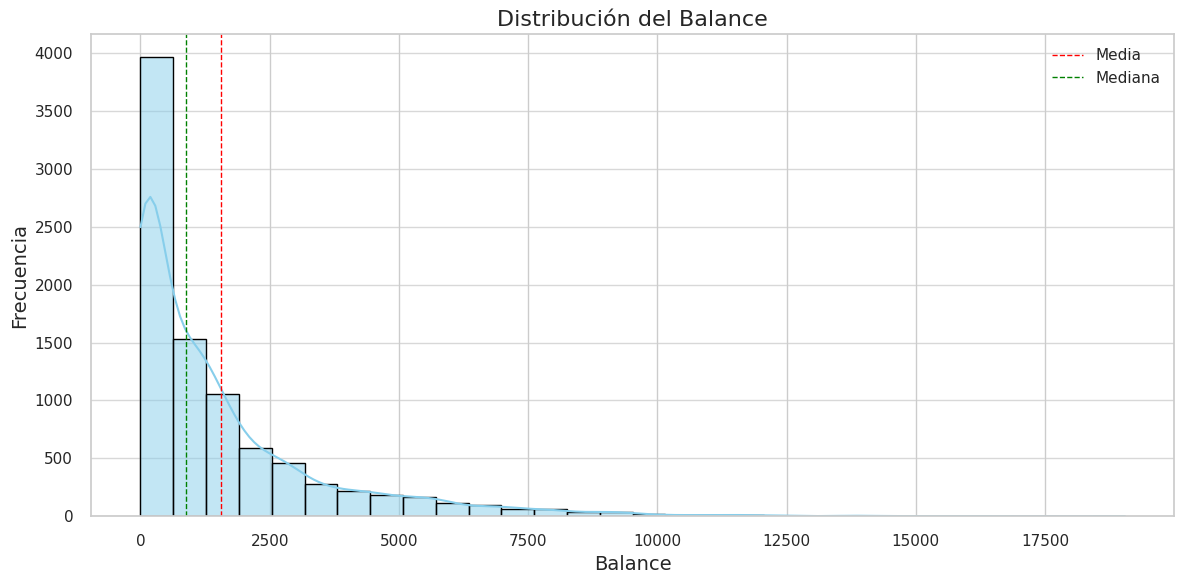

In [60]:
# 2. Visualización de distribuciones
# Histograma para el Balance
plt.figure(figsize=(12, 6))
sns.histplot(data['BALANCE'], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribución del Balance', fontsize=16)
plt.xlabel('Balance', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.grid(axis='y', alpha=0.75)  # Agrega una cuadrícula en el eje y
plt.axvline(data['BALANCE'].mean(), color='red', linestyle='dashed', linewidth=1, label='Media')  # Línea de media
plt.axvline(data['BALANCE'].median(), color='green', linestyle='dashed', linewidth=1, label='Mediana')  # Línea de mediana
plt.legend()
plt.tight_layout()
plt.show()

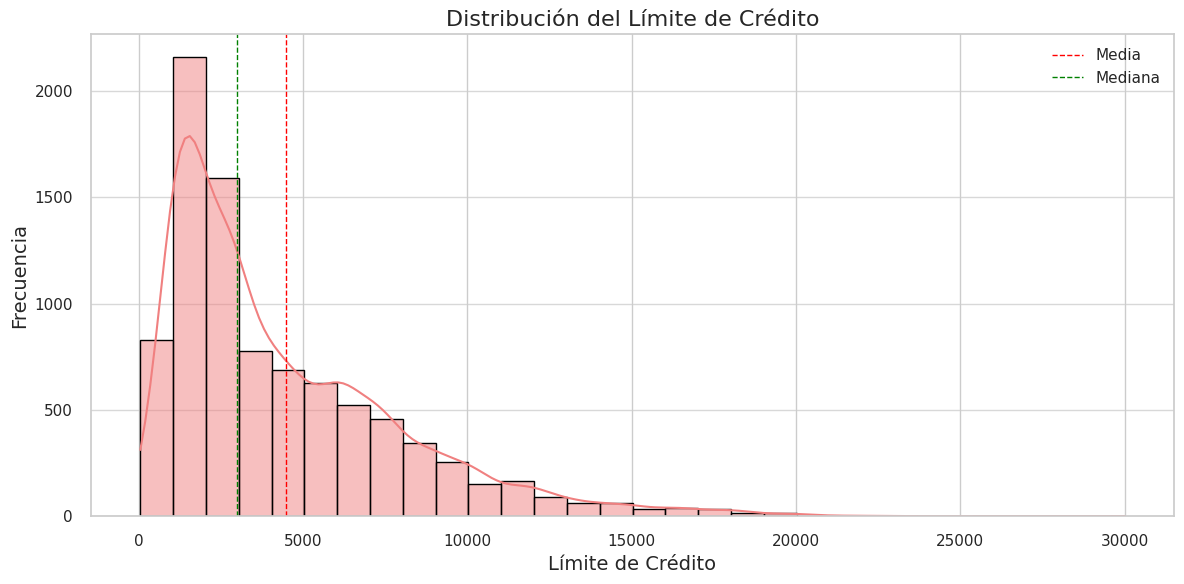

In [61]:
# Histograma para el Límite de Crédito
plt.figure(figsize=(12, 6))
sns.histplot(data['CREDIT_LIMIT'], bins=30, kde=True, color='lightcoral', edgecolor='black')
plt.title('Distribución del Límite de Crédito', fontsize=16)
plt.xlabel('Límite de Crédito', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.grid(axis='y', alpha=0.75)  # Agrega una cuadrícula en el eje y
plt.axvline(data['CREDIT_LIMIT'].mean(), color='red', linestyle='dashed', linewidth=1, label='Media')  # Línea de media
plt.axvline(data['CREDIT_LIMIT'].median(), color='green', linestyle='dashed', linewidth=1, label='Mediana')  # Línea de mediana
plt.legend()
plt.tight_layout()
plt.show()

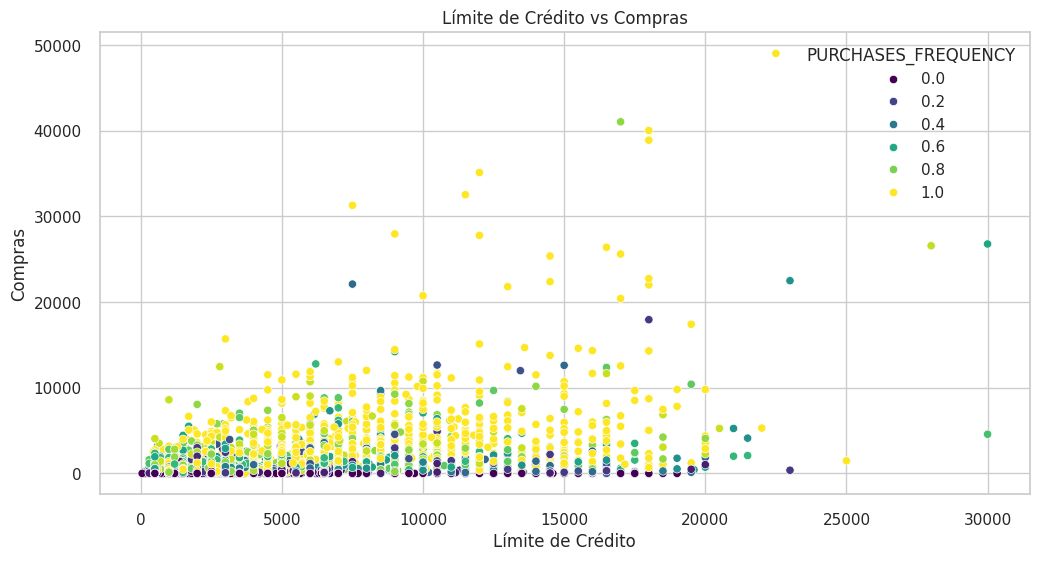

In [62]:
# 3. Gráficos de dispersión
plt.figure(figsize=(12, 6))
sns.scatterplot(x='CREDIT_LIMIT', y='PURCHASES', data=data, hue='PURCHASES_FREQUENCY', palette='viridis')
plt.title('Límite de Crédito vs Compras')
plt.xlabel('Límite de Crédito')
plt.ylabel('Compras')
plt.show()

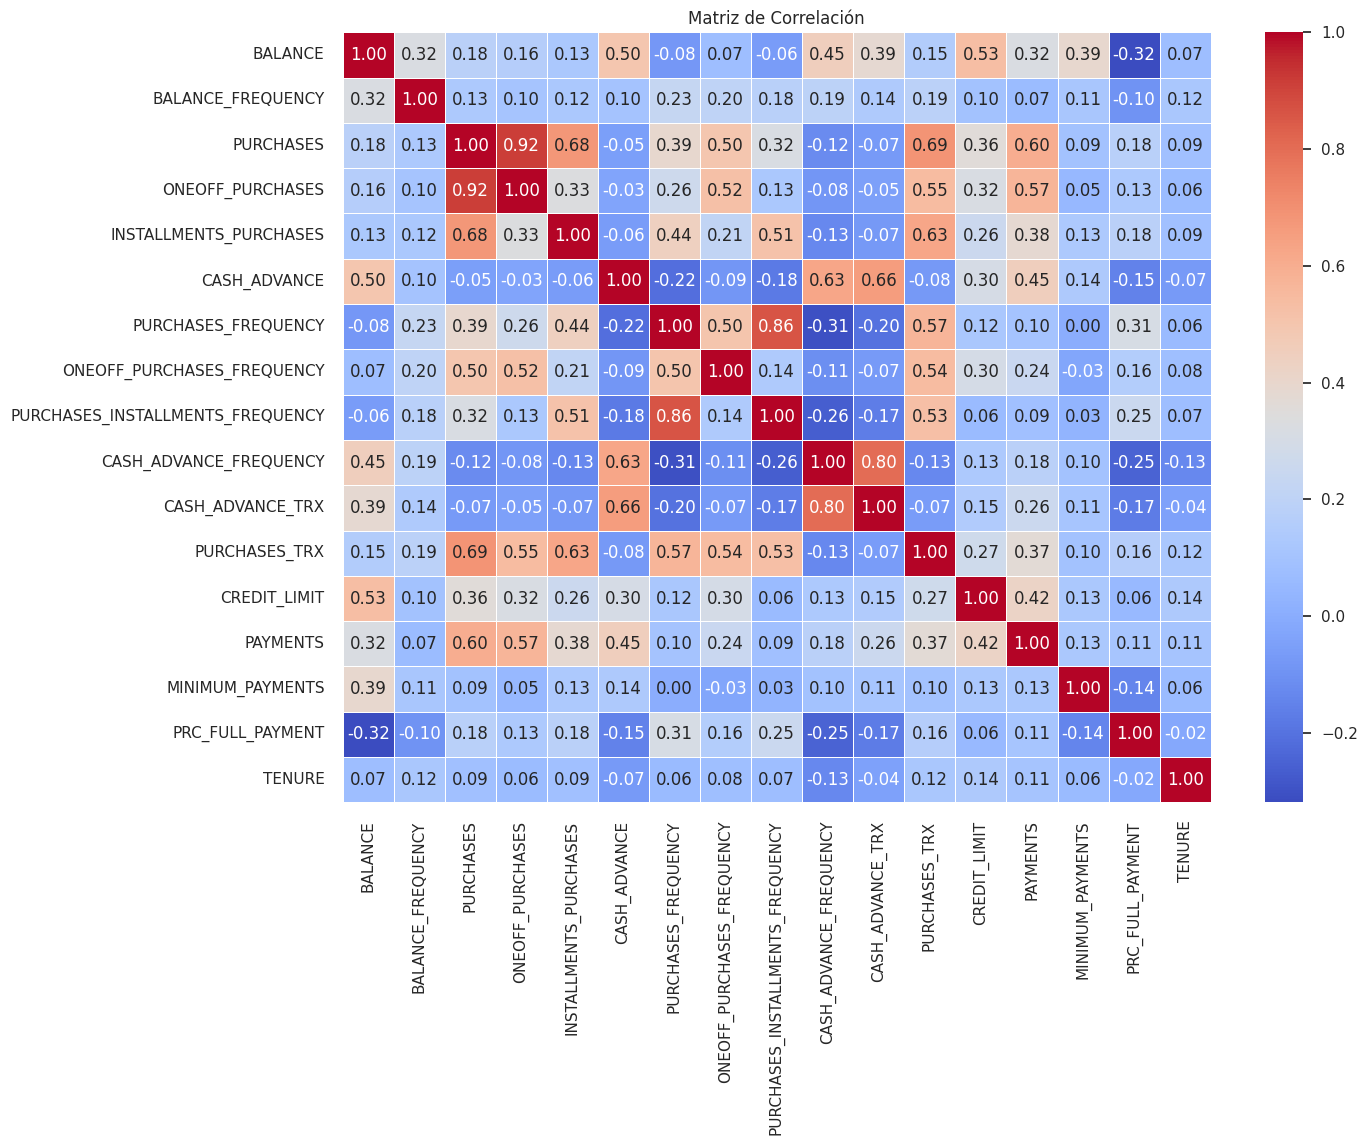

In [63]:
# Asegúrate de que las columnas relevantes son numéricas
numeric_data = data.select_dtypes(include=[np.number])  # Seleccionar solo columnas numéricas

# Comprobar si hay valores nulos
if numeric_data.isnull().sum().any():
    numeric_data = numeric_data.dropna()  # O manejar los valores nulos como prefieras

# 4 Matriz de correlación
plt.figure(figsize=(14, 10))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

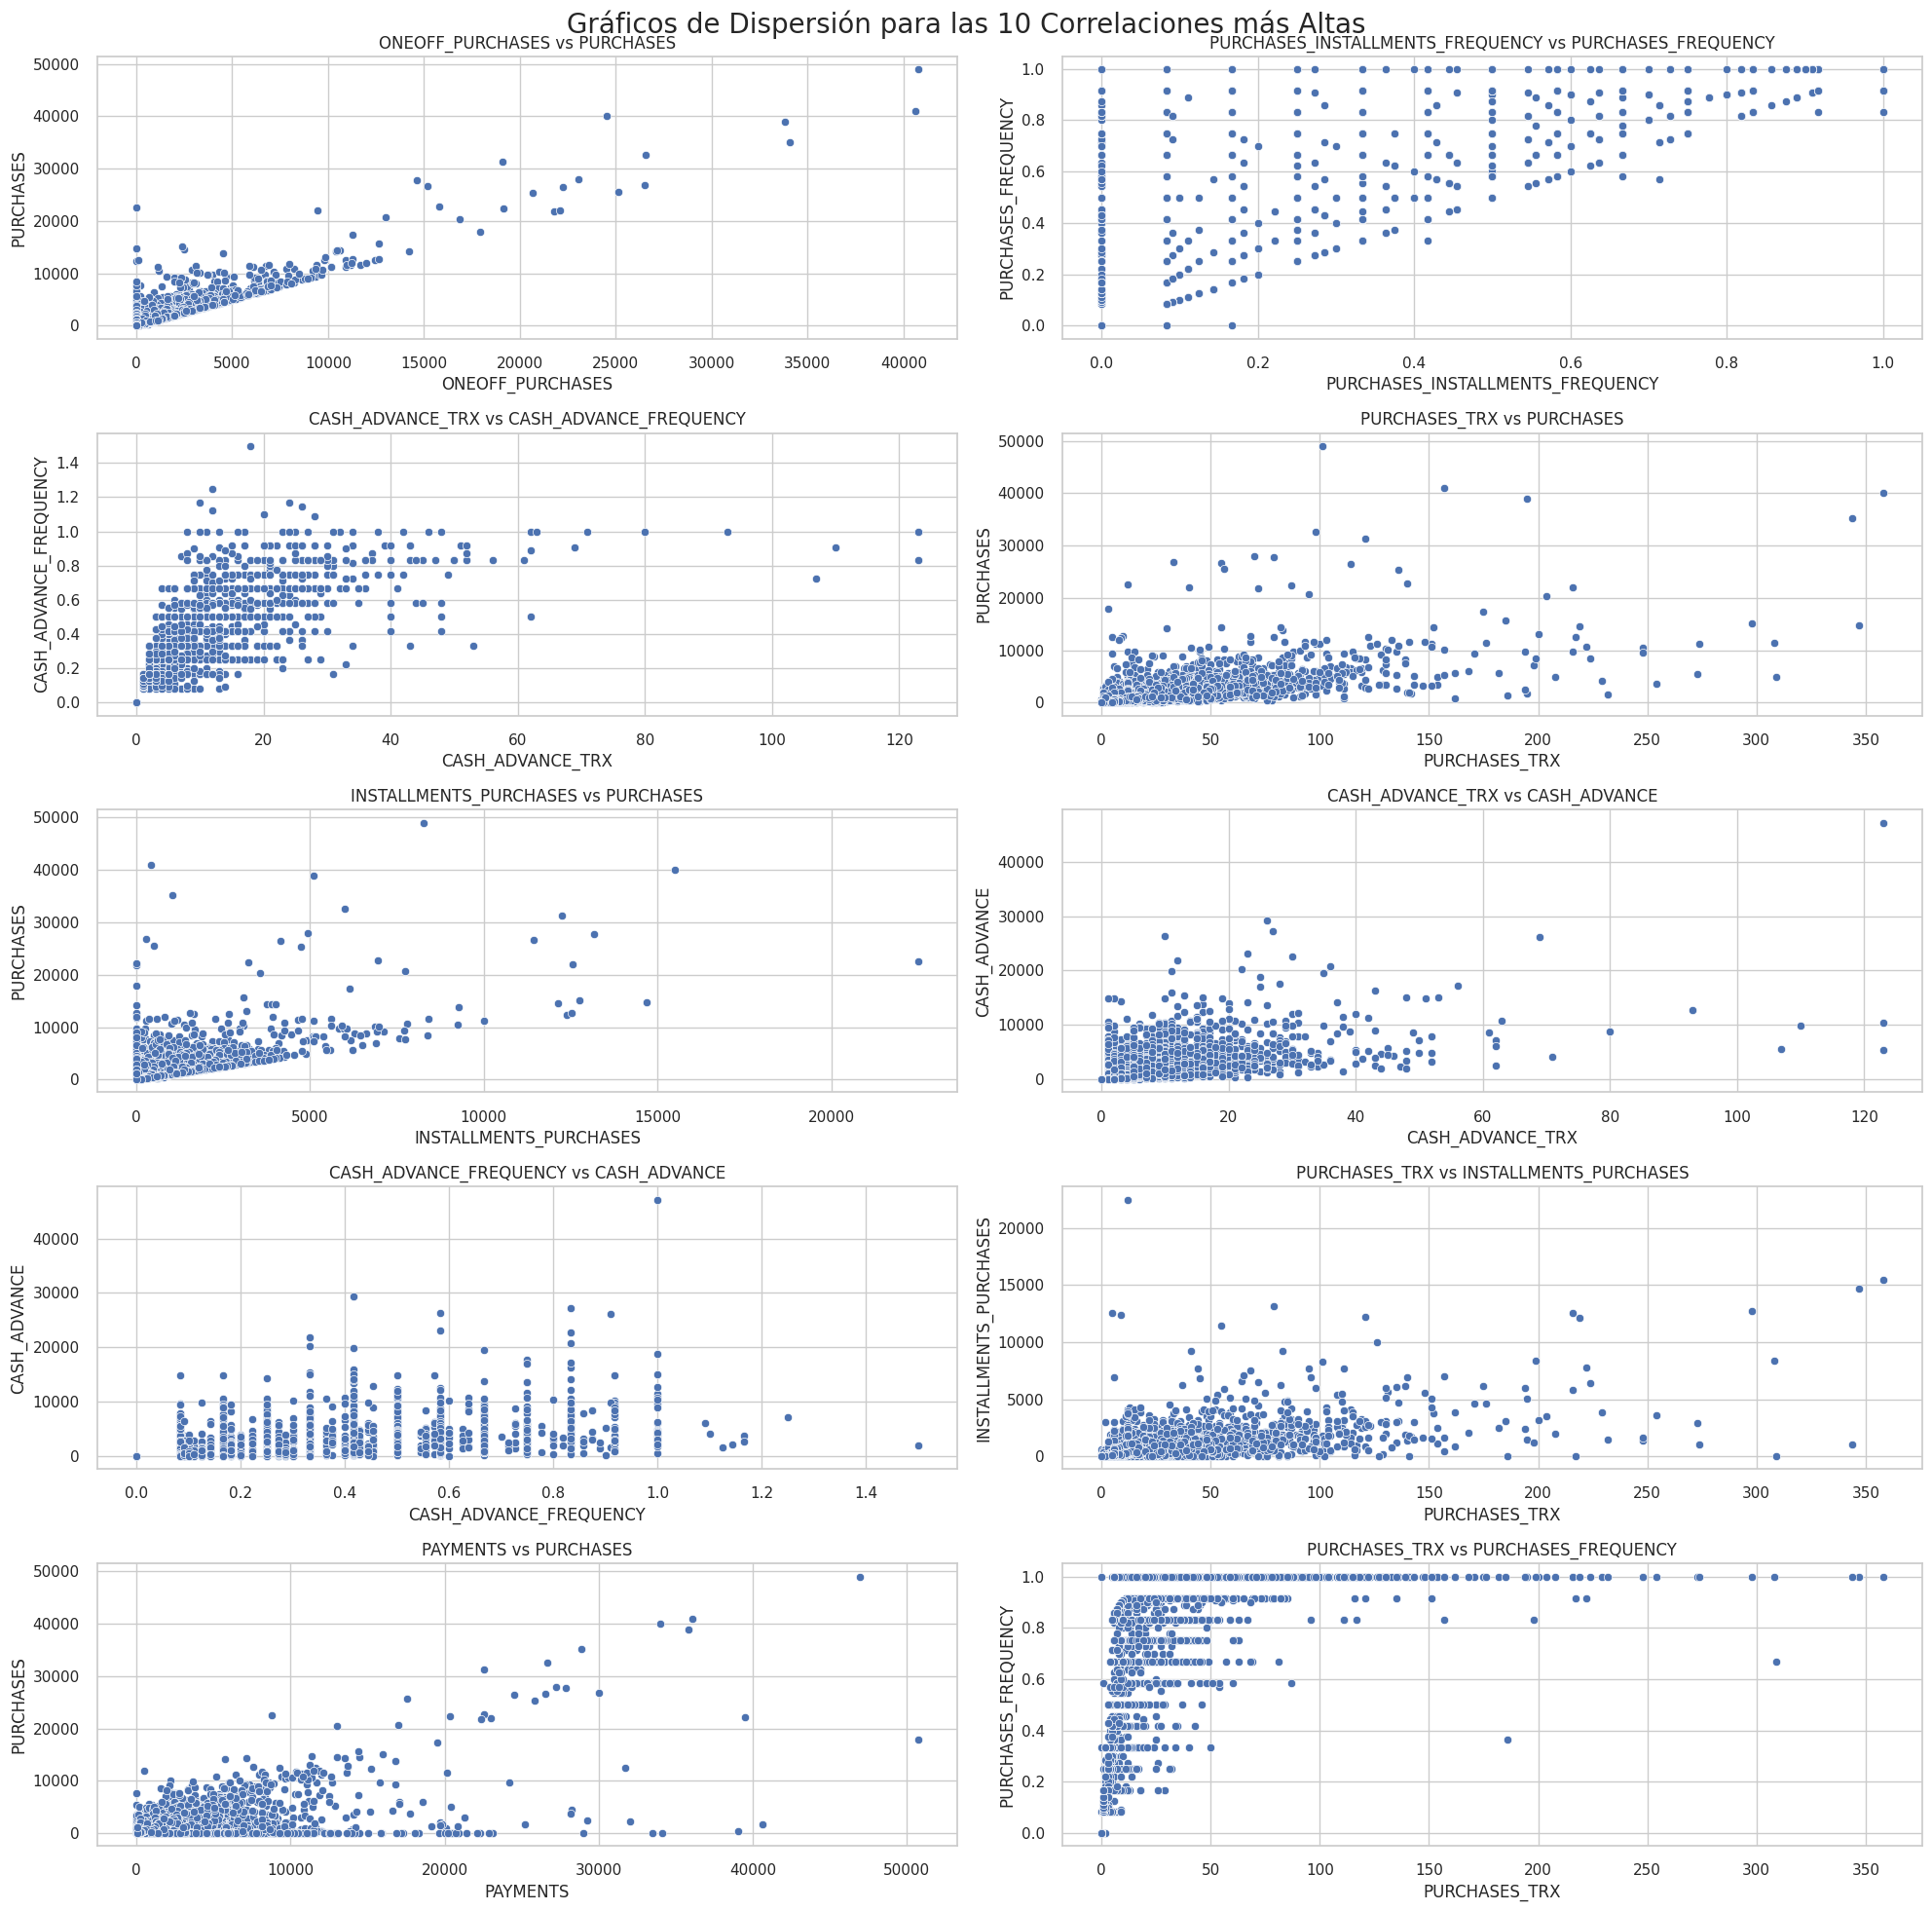

In [64]:
# Top 10 de las correlaciones más altas reflejados en matriz de correlación y graficas en grafica de dispersion
correlation_matrix = numeric_data.corr()
correlation_matrix = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
correlation_matrix = correlation_matrix.unstack().reset_index()
correlation_matrix.columns = ['Feature 1', 'Feature 2', 'Correlation']
correlation_matrix['Correlation'] = correlation_matrix['Correlation'].abs()
correlation_matrix.sort_values(by='Correlation', ascending=False, inplace=True)
correlation_matrix = correlation_matrix.dropna()
correlation_matrix.head(10)

# Gráficos de dispersión para las 10 correlaciones más altas
top_correlations = correlation_matrix.head(10)
fig, axes = plt.subplots(5, 2, figsize=(20, 20))
fig.suptitle('Gráficos de Dispersión para las 10 Correlaciones más Altas', fontsize=20)
axes = axes.ravel()
for i, (feature1, feature2, _) in enumerate(top_correlations.values):
    sns.scatterplot(x=feature1, y=feature2, data=numeric_data, ax=axes[i])
    axes[i].set_title(f'{feature1} vs {feature2}')
plt.tight_layout()
plt.show()

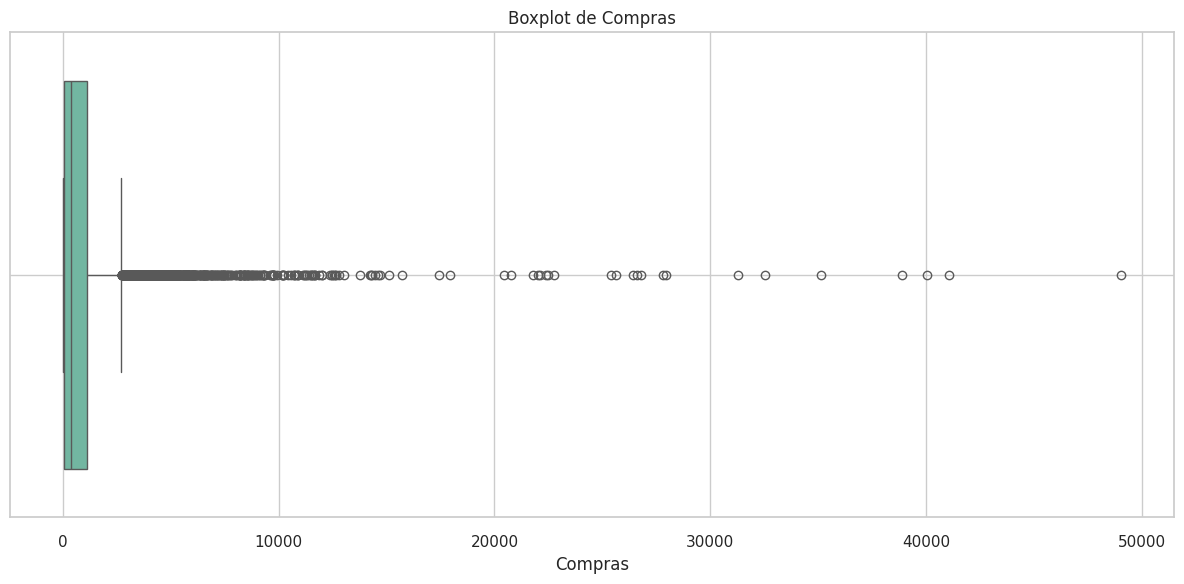

In [65]:
# 5. Boxplots para detectar anomalías
# Boxplot para las Compras
plt.figure(figsize=(12, 6))
sns.boxplot(x='PURCHASES', data=data, palette='Set2')
plt.title('Boxplot de Compras')
plt.xlabel('Compras')
plt.grid(True)  # Agrega una cuadrícula para mejorar la legibilidad
plt.tight_layout()  # Ajusta el layout para evitar solapamientos
plt.show()

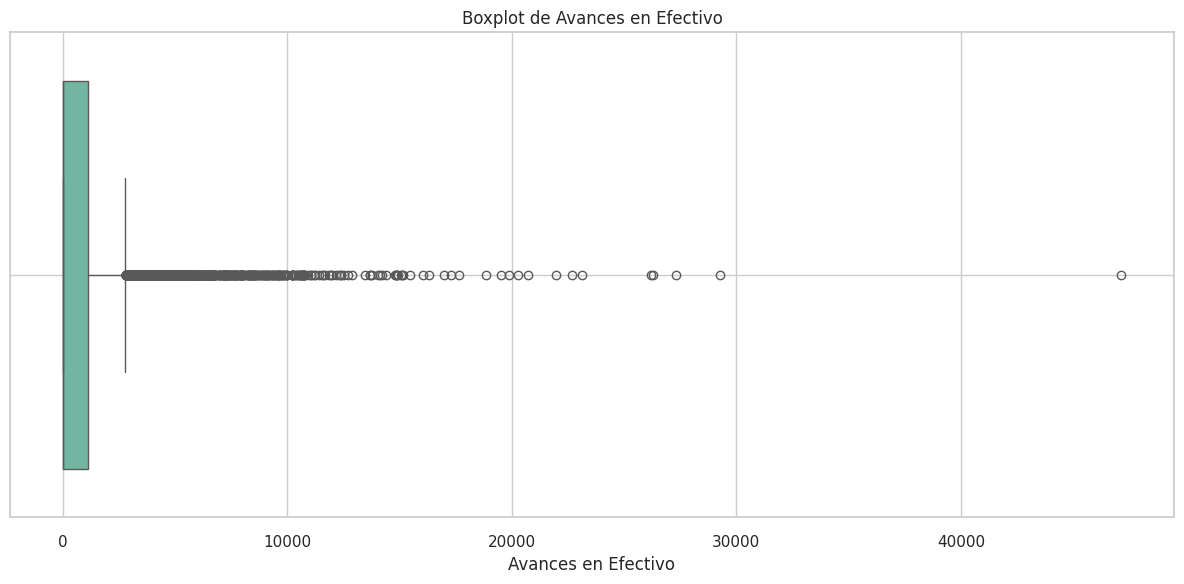

In [66]:
# Boxplot para Avances en Efectivo
plt.figure(figsize=(12, 6))
sns.boxplot(x='CASH_ADVANCE', data=data, palette='Set2')
plt.title('Boxplot de Avances en Efectivo')
plt.xlabel('Avances en Efectivo')
plt.grid(True)  # Agrega una cuadrícula para mejorar la legibilidad
plt.tight_layout()  # Ajusta el layout para evitar solapamientos
plt.show()

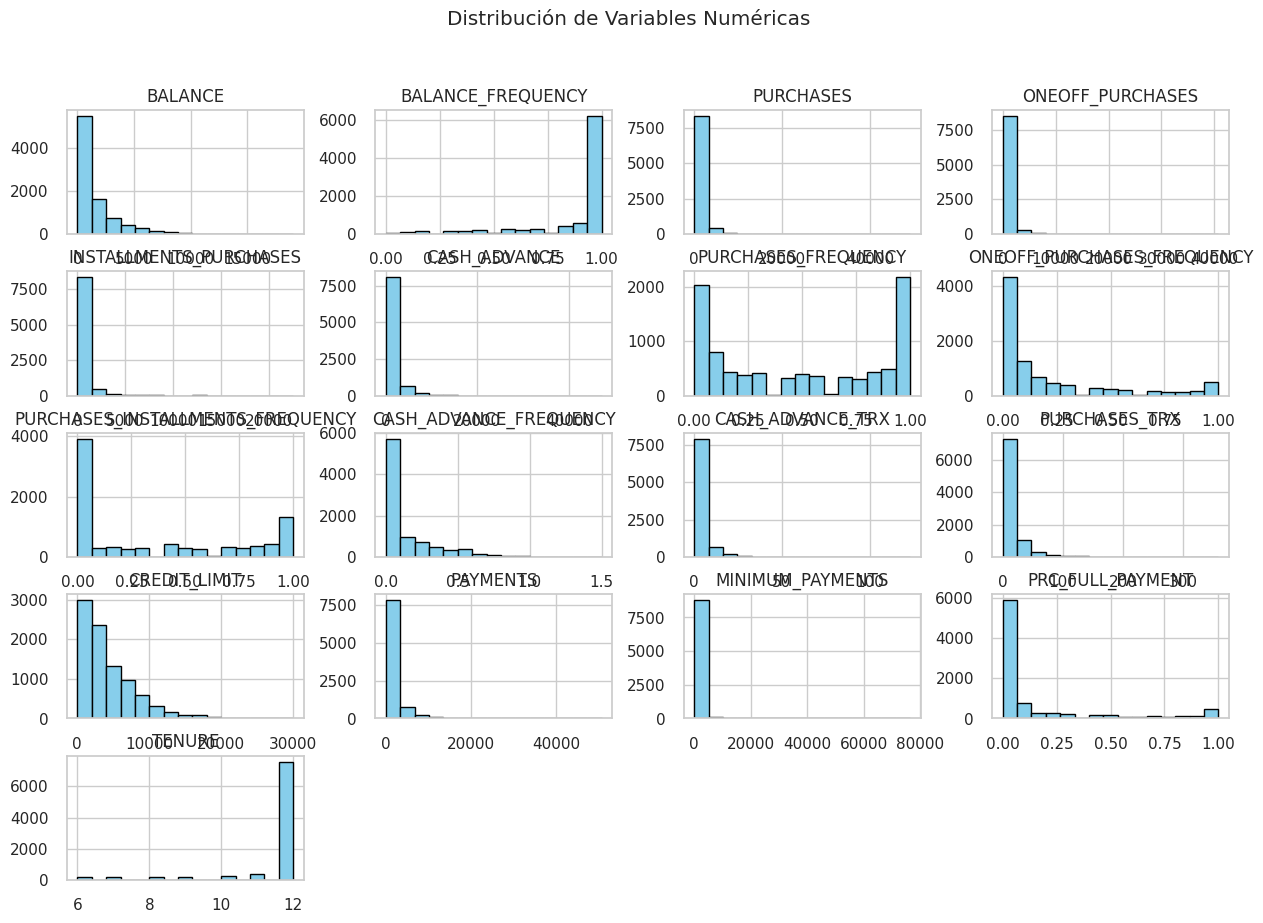

In [67]:
# Paso 6: Distribución de variables numéricas
# Crear histogramas para cada columna numérica para ver la distribución de los valores
numeric_cols = data.select_dtypes(include=np.number).columns  # Seleccionar columnas numéricas

data[numeric_cols].hist(bins=15, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Distribución de Variables Numéricas")
plt.show()

Análisis de Outliers de las Variables:


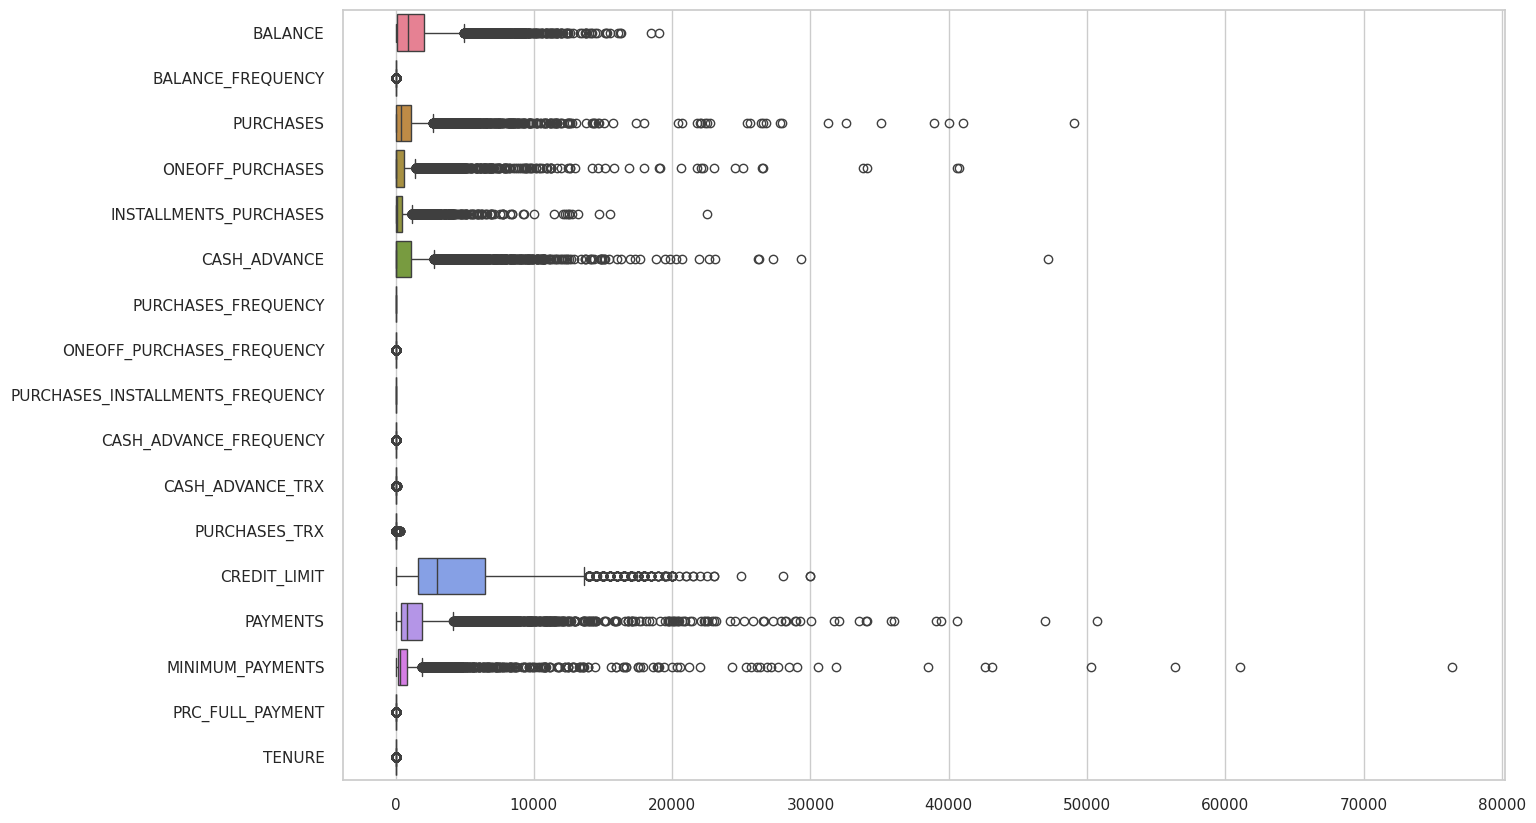

In [68]:
# Realice un análisis de outliers de las variables
print("Análisis de Outliers de las Variables:")
plt.figure(figsize=(15, 10))
sns.boxplot(data=data, orient='h')
plt.show()

Relación entre las Variables:


<Figure size 1500x1000 with 0 Axes>

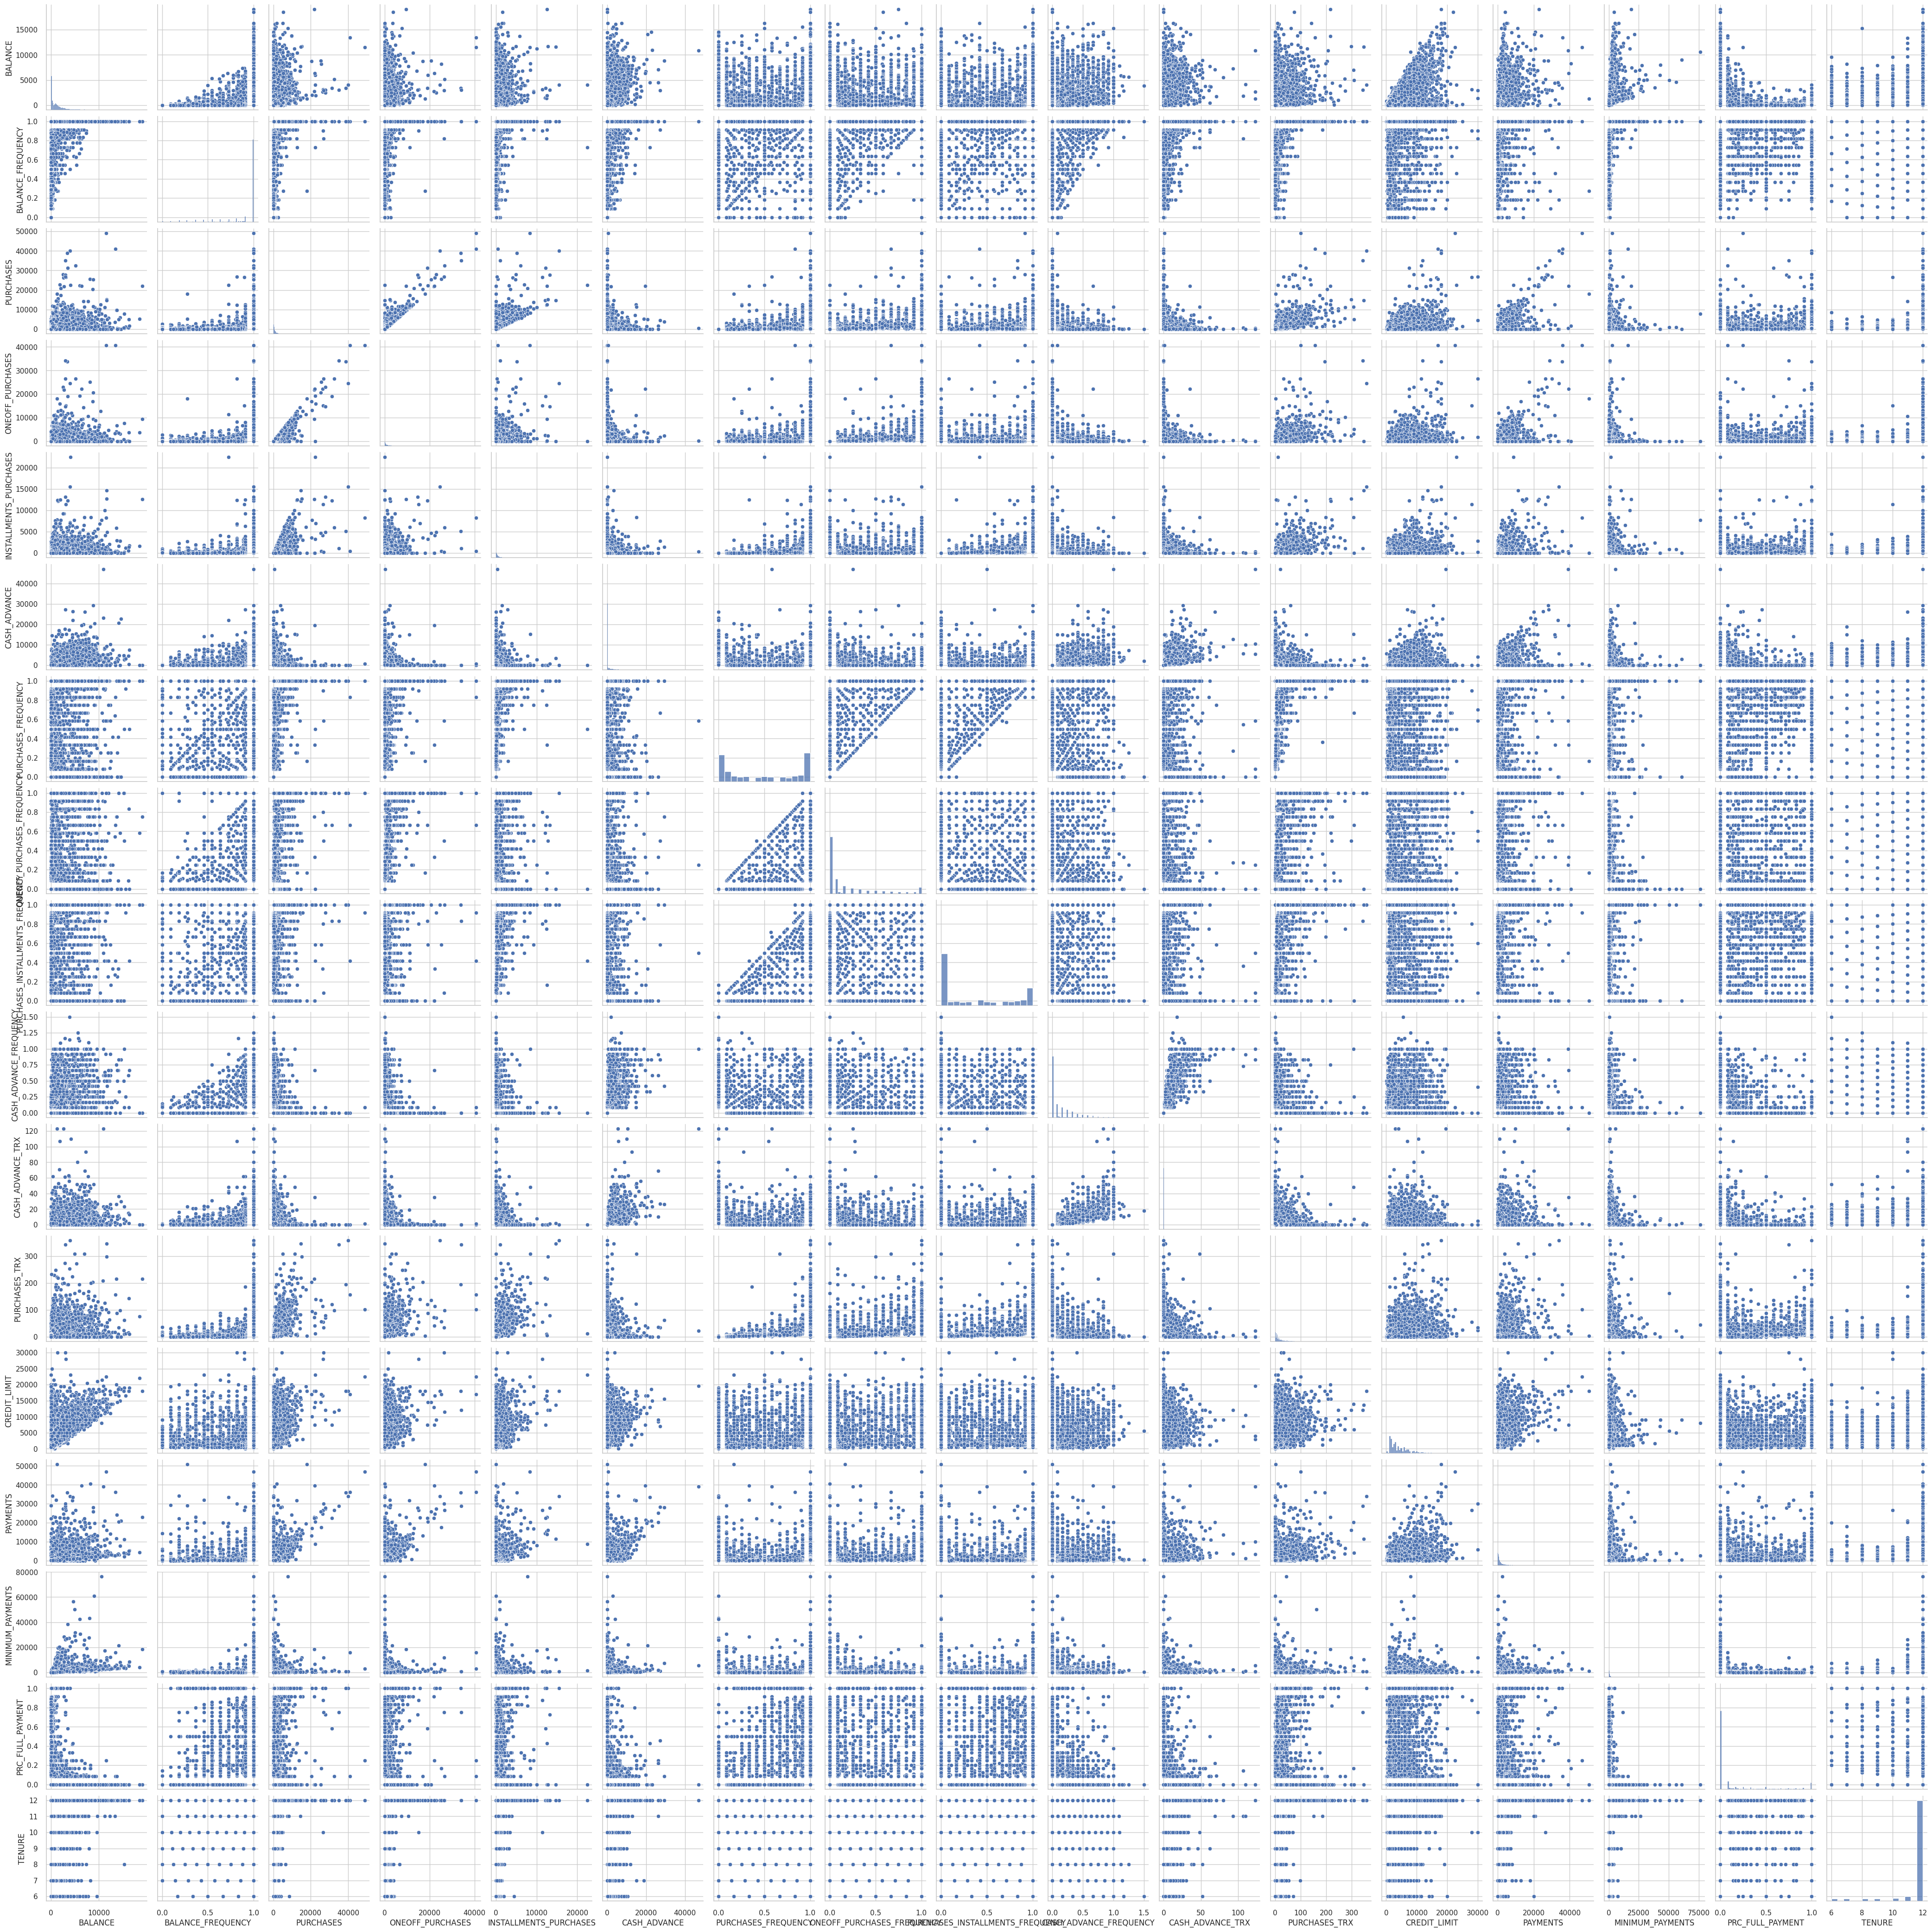

In [69]:
# ¿Qué puede decir de la relación entre las variables?
print("Relación entre las Variables:")
plt.figure(figsize=(15, 10))
sns.pairplot(data=data)
plt.show()

## TRANSFORMACION DE DATOS

# Modelos de Cluster

1. KMeans (K-medias)
2. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
3. Agrupamiento jerárquico (Hierarchical Clustering)
4. MiniBatchKMeans
5. Clustering Espectral (Spectral Clustering)



# KMeans (K-medias)

Descripción: KMeans es uno de los algoritmos de clustering más populares. La idea principal es dividir los datos en K clusters de tal manera que los puntos dentro de un mismo cluster sean lo más similares posibles, mientras que los puntos de diferentes clusters sean lo más diferentes posibles. Esto se logra mediante la minimización de la suma de las distancias cuadradas entre los puntos y el centroide (media) del cluster.

Pasos:

1. Elegir un valor de K (el número de clusters).
2. Inicializar K centroides aleatorios.
3. Asignar cada punto al cluster cuyo centroide esté más cercano.
4. Recalcular los centroides de los clusters.
5. Repetir los pasos anteriores hasta que los centroides no cambien o el número de iteraciones sea alcanzado.

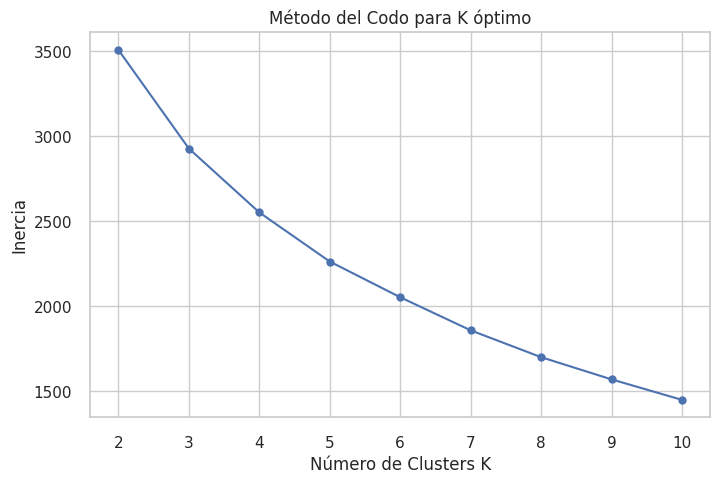

In [70]:
# Escalar los datos numéricos para mejorar el desempeño del algoritmo KMeans
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[numeric_cols]) 

# Aplicar KMeans
inertias = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=50)
    kmeans.fit(data_scaled)
    inertias.append(kmeans.inertia_)

# Graficar el Método del Codo: la inercia en función de la cantidad de clusters
plt.figure(figsize=(8, 5))
plt.plot(K, inertias, 'bo-') 
plt.xlabel('Número de Clusters K')
plt.ylabel('Inercia')
plt.title('Método del Codo para K óptimo')
plt.show()

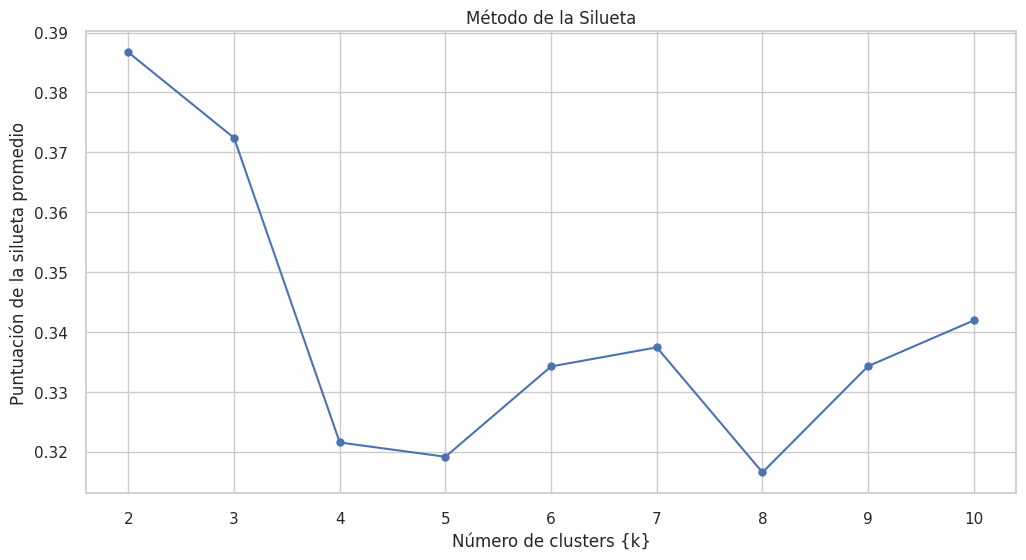

In [71]:
silueta = []

k_range = range(2, 11)

# Probar diferentes valores de K para el modelo KMeans
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=50)
    labels = kmeans.fit_predict(data_scaled)
    silhouette_avg = silhouette_score(data_scaled, labels)
    silueta.append(silhouette_avg)

plt.figure(figsize=(12, 6))
plt.plot(k_range, silueta, marker='o')
plt.title('Método de la Silueta')
plt.xlabel('Número de clusters {k}')
plt.ylabel('Puntuación de la silueta promedio')
plt.show()

In [72]:
model_kmeans = KMeans(n_clusters=2, random_state=42)
model_kmeans.fit(data_scaled)
grupo = model_kmeans.predict(data_scaled)

datosGrupos = data
datosGrupos['Grupo Kmeans'] = grupo
datosGrupos.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Grupo Kmeans  
0   201.802084        139.509787          0.000000      12             0  
1  4103.032597       1072.340217          0.222222      12             0  
2   622.066742        627.284787          0.000000      12             1  
3     0.000000        864.206542          0.000000      12             0  
4   678.334763        244.791237          0.000000      12             0

In [73]:
# centroides
centroides = pd.DataFrame(scaler.inverse_transform(model_kmeans.cluster_centers_), columns=numeric_cols)
centroides

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
0  1693.794846           0.828569   323.379323        257.286654   
1  1406.595301           0.936728  1833.165506       1001.604002   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               66.329122   1316.574986             0.160205   
1              831.939489    566.587475             0.893406   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.092725                          0.066248   
1                    0.336424                          0.728480   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.182356          4.314431       3.130081   4128.638685   
1                0.077506          1.947891      28.846898   4941.047209   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT     TENURE  
0  1464.054646        847.728541          0.071206  11.449797  
1  2061.659707        884.323606          0.254444  11.599752

In [74]:
datosGrupos['Grupo Kmeans'].value_counts()

Grupo Kmeans
0    4915
1    4035
Name: count, dtype: int64

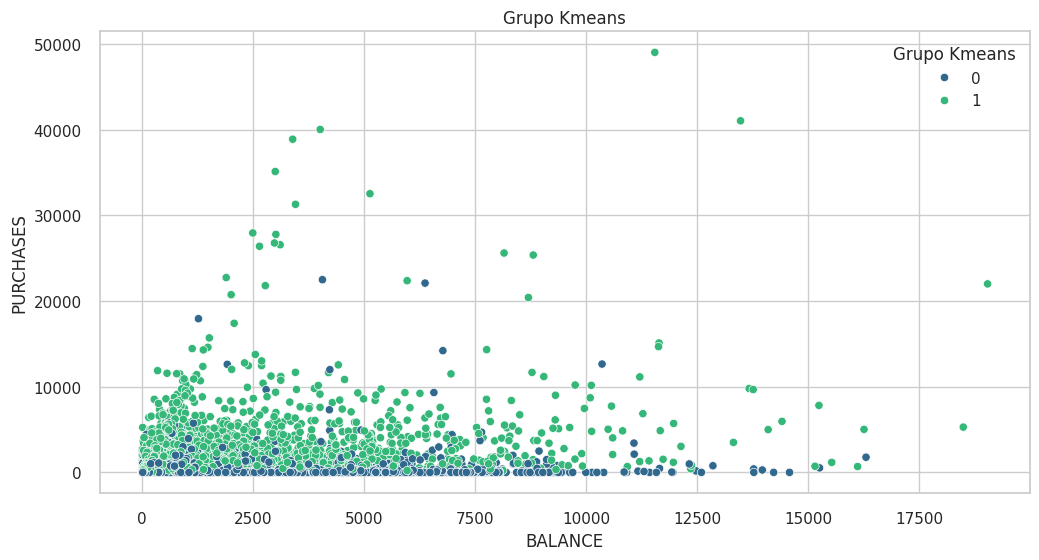

In [93]:
# Graficar Grupos Kmeans
# fig = px.scatter_3d(datosGrupos, x='BALANCE', y='PURCHASES', z='CREDIT_LIMIT', color='Grupo Kmeans')
# fig.show()

# graficar grupo kmeanz 2d
plt.figure(figsize=(12, 6))
sns.scatterplot(data=datosGrupos, x='BALANCE', y='PURCHASES', hue='Grupo Kmeans', palette='viridis')
plt.title('Grupo Kmeans')
plt.show()


## Agrupamiento jerarquico
_Algoritmo jerarquico aglomerativo_:
1. Determinar que cada individuo es un grupo.
2. Calcular la distancia entre cada **grupo**
3. Unir grupos mediante la menor distancia.
4. Repite los pasos 2 y 3 hasta que todos los individuos sean un grupo
5. Dibuja un dendograma
6. Se determina la cantidad de grupos por corte del dendograma


**Metrica de asociacion**
1. Completa o Maxima: Se calculan todas las posibles distancias de los miembros entre los grupos, y se usa la maxima.
2. Simple o Minima: Se calculan todas las posibles distancias de los miembros entre los grupos y se usa la minima.
3. Promedio: se calcula todas las posibles distancias de los miembros entre los grupos y se usa el promedio de esas distancias
4. Asociacion por Triangulacion :
  - *WARD* Maxima variaza _(mas usado)_: Definir un centro y se calcula la distancia entre los grupos

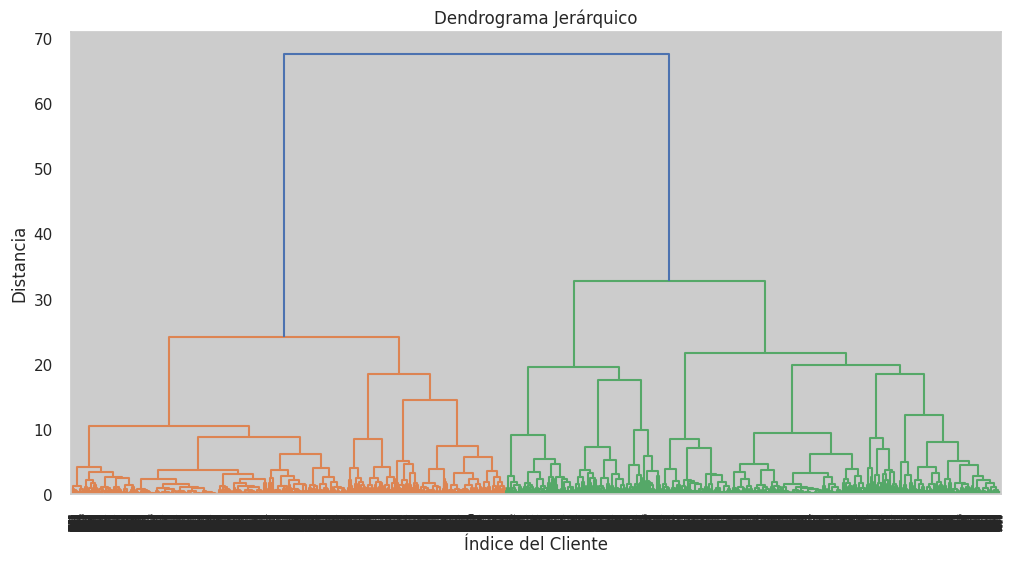

In [76]:
Z = linkage(data_scaled, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title('Dendrograma Jerárquico')
plt.xlabel('Índice del Cliente')
plt.ylabel('Distancia')
plt.show()


In [77]:
model_jerarquico = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
model_jerarquico.fit_predict(data_scaled)

labels = model_jerarquico.labels_
datosGrupos['Grupo Jerárquico'] = labels
datosGrupos.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Grupo Kmeans  \
0   201.802084        139.509787          0.000000      12             0   
1  4103.032597       1072.340217          0.222222      12             0   
2   622.066742        627.284787          0.000000      12             1   
3     0.000000        864.206542          0.000000      12             0   
4   678.334763        244.791237          0.000000      12             0   

   Grupo Jerárquico  
0                 1  
1                 1  
2                 0  
3                 1  
4                 1

In [78]:
datosGrupos['Grupo Jerárquico'].value_counts()

Grupo Jerárquico
0    4763
1    4187
Name: count, dtype: int64

In [79]:
# Graficar Grupos Jerárquicos
fig = px.scatter_3d(datosGrupos, x='BALANCE', y='PURCHASES', z='CREDIT_LIMIT', color='Grupo Jerárquico')
fig.show()


## DBScan
Tipos de individuos
1. Punto de nucleo  
   Cuando un punto cumple con el minimo de muestras dentro del radio.
2. Punto de Frontera
   Punto que no es de nucleo, pero esta dentro del rango de otro punto de nucleo
3. Punto de ruido
   No es ninguno de los anteriores

Se hace a partir de 2 hiperparametros:
- Epsilon:  
  Radio de accion de densidad
- Minimo de muestras:  
  Cantidad de individuos en densidad


### Pasos del algoritmo
1. Determinar el radio (epsilon) y los individuos (minimo de muestras).
2. Definir aleatoriamente un individuo de inicialización.
3. Determinar el *tipo de individuo*
4. Moverse de punto
5. Finaliza cuando todos los individuos tienen tipo (son clasificados)

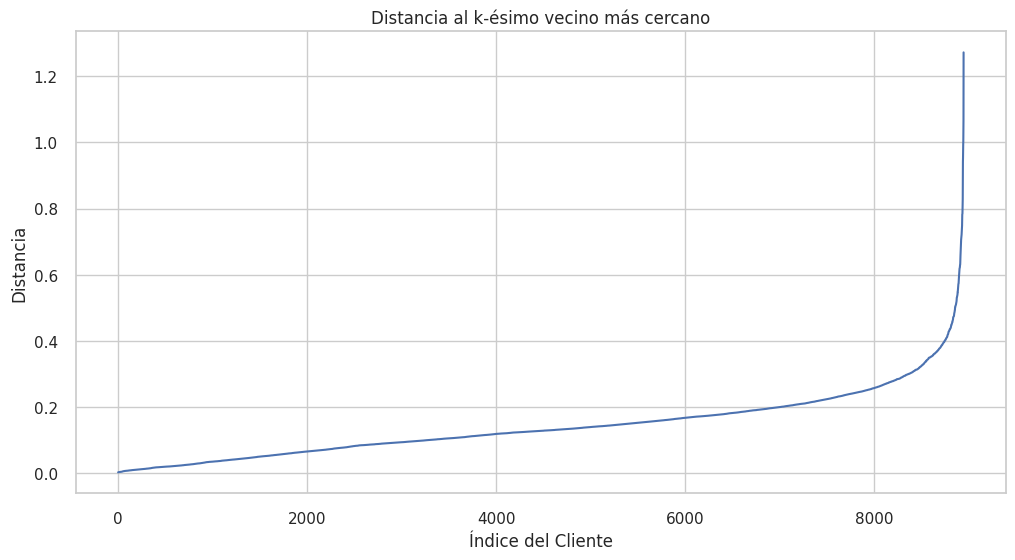

In [80]:
# neighbors debe ser igual a min_samples para que DBSCAN funcione correctamente
min_samples = 5

# Encontrar los vecinos más cercanos
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(data_scaled)

# calcular la distancia de los k-ésimos vecinos más cercanos
distances, indices = neighbors_fit.kneighbors(data_scaled)

# Ordenar las distancias al k-ésimo vecino más cercano
# Seleccionar la distancia al último vecino (el min_samples vecino más cercano)
distances = np.sort(distances, axis=0)
distances = distances[:, -1]

# Graficar la distancia al k-ésimo vecino más cercano
plt.figure(figsize=(12, 6))
plt.plot(indices[:, 0], distances)
plt.title('Distancia al k-ésimo vecino más cercano')
plt.xlabel('Índice del Cliente')
plt.ylabel('Distancia')
plt.show()

In [95]:
# Definir los rangos de parámetros
eps_values = np.linspace(0.1, 1.0, 10)
min_samples_values = range(2, 11)
parameters = list(product(eps_values, min_samples_values))

sil_score = []  # Lista para almacenar los puntajes de silueta

# Probar diferentes valores de eps y min_samples
for p in parameters:
    eps, min_samples = p
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)  # Crear el modelo DBSCAN

    try:
        # Ajustar y predecir los clusters
        y_pred = dbscan.fit_predict(data_scaled)

        # Validar que haya al menos dos clusters y que no todos sean ruido (-1)
        if len(set(y_pred)) > 1 and -1 in y_pred and len(set(y_pred)) > 2:
            # Calcular el índice de silueta solo si hay más de un cluster válido
            score = silhouette_score(data_scaled, y_pred)
        else:
            # Asignar -1 si no hay clusters válidos
            score = -1
    except Exception as e:
        # Si hay un error (por ejemplo, todos los puntos son considerados ruido), se asigna -1
        score = -1

    # Almacenar el puntaje de silueta para esta combinación de parámetros
    sil_score.append((eps, min_samples, score))

# Convertir los resultados a un DataFrame para facilitar la visualización
resultados = pd.DataFrame(sil_score, columns=['epsilon', 'min_samples', 'silhouette_score'])

# Mostrar los mejores resultados ordenados por el puntaje de silueta
resultados = resultados[resultados['silhouette_score'] != -1]  # Eliminar resultados inválidos
resultados = resultados.sort_values(by='silhouette_score', ascending=False)  # Ordenar de mejor a

# Mostrar los resultados
print(resultados.head())  # Muestra los mejores resultados

    epsilon  min_samples  silhouette_score
45      0.6            2          0.349296
36      0.5            2          0.222749
29      0.4            4          0.213357
30      0.4            5          0.210227
31      0.4            6          0.208743


In [106]:
model_dbscan = DBSCAN(eps=0.6, min_samples=2)
model_dbscan.fit_predict(data_scaled)

labels = model_dbscan.labels_
datosGrupos['Grupo DBSCAN'] = labels
datosGrupos.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  ...  \
0                    0.000000                          0.083333  ...   
1                    0.000000                          0.000000  ...   
2                    1.000000                          0.000000  ...   
3                    0.083333                          0.000000  ...   
4                    0.083333                          0.000000  ...   

   CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  \
0        1000.0   201.802084        139.509787          0.000000      12   
1        7000.0  4103.032597       1072.340217          0.222222      12   
2        7500.0   622.066742        627.284787          0.000000      12   
3        7500.0     0.000000        864.206542          0.000000      12   
4        1200.0   678.334763        244.791237          0.000000      12   

   Grupo Kmeans  Grupo Jerárquico  Grupo DBSCAN  Grupo MiniBatchKMeans  \
0             0                 1             0                      1   
1             0                 1             0                      1   
2             1                 0             0                      0   
3             0                 1             0                      1   
4             0                 1             0                      1   

   Grupo Spectral  
0               1  
1               1  
2               0  
3               1  
4               1  

[5 rows x 23 columns]

In [107]:
datosGrupos["Grupo DBSCAN"].value_counts()

Grupo DBSCAN
 0    8925
-1      23
 1       2
Name: count, dtype: int64

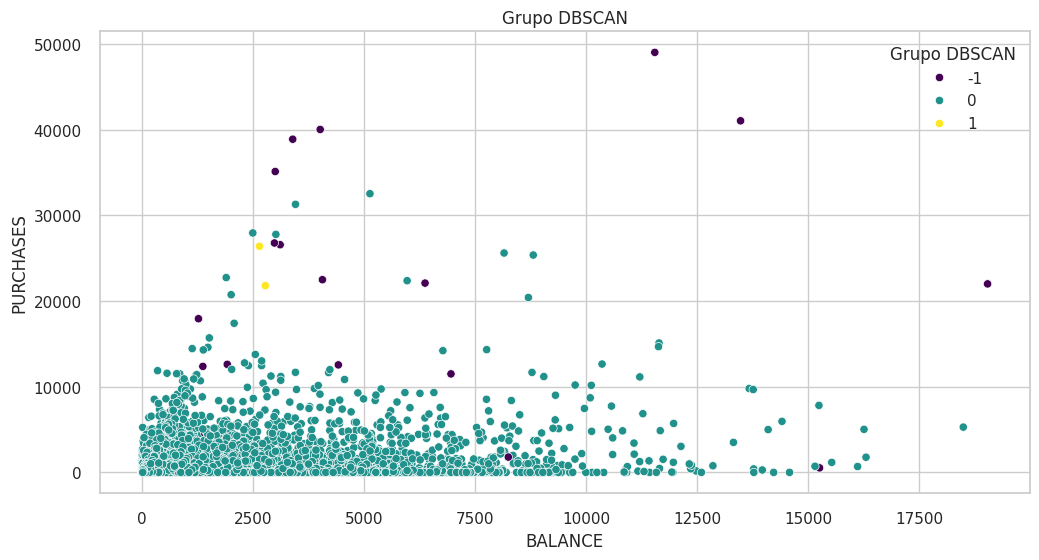

In [99]:
# # Graficas Grupo DBSCAN
# fig = px.scatter_3d(datosGrupos, x='BALANCE', y='PURCHASES', z='CREDIT_LIMIT', color='Grupo DBSCAN')
# fig.show()

# Graficar Grupos DBSCAN 2d
plt.figure(figsize=(12, 6))
sns.scatterplot(data=datosGrupos, x='BALANCE', y='PURCHASES', hue='Grupo DBSCAN', palette='viridis')
plt.title('Grupo DBSCAN')
plt.show()

# MiniBatchKMeans

Descripción: MiniBatchKMeans es una versión más rápida de KMeans, diseñada para trabajar con grandes conjuntos de datos. En lugar de usar todos los puntos de datos en cada iteración (como hace KMeans), utiliza un subconjunto aleatorio (un "mini-batch") en cada iteración, lo que reduce el tiempo de cómputo.

Este método es especialmente útil cuando tienes grandes volúmenes de datos y no puedes permitirte esperar el tiempo que tarda KMeans tradicional.

Pasos:

1. Similar a KMeans, se inicia con un número de centroides y se asignan puntos a los clusters más cercanos.
2. A diferencia de KMeans, MiniBatchKMeans selecciona aleatoriamente un pequeño subconjunto de datos (mini-batch) en cada iteración para actualizar los centroides, lo que mejora la eficiencia.
3. Se repite el proceso de asignación y actualización de centroides hasta la convergencia.

In [108]:
# Aplicar el modelo MiniBatchKMeans
model_mini_batch_kmeans = MiniBatchKMeans(n_clusters=2, random_state=42)
model_mini_batch_kmeans.fit(data_scaled)
grupo = model_mini_batch_kmeans.predict(data_scaled)

datosGrupos['Grupo MiniBatchKMeans'] = grupo
datosGrupos.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  ...  \
0                    0.000000                          0.083333  ...   
1                    0.000000                          0.000000  ...   
2                    1.000000                          0.000000  ...   
3                    0.083333                          0.000000  ...   
4                    0.083333                          0.000000  ...   

   CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  \
0        1000.0   201.802084        139.509787          0.000000      12   
1        7000.0  4103.032597       1072.340217          0.222222      12   
2        7500.0   622.066742        627.284787          0.000000      12   
3        7500.0     0.000000        864.206542          0.000000      12   
4        1200.0   678.334763        244.791237          0.000000      12   

   Grupo Kmeans  Grupo Jerárquico  Grupo DBSCAN  Grupo MiniBatchKMeans  \
0             0                 1             0                      1   
1             0                 1             0                      1   
2             1                 0             0                      0   
3             0                 1             0                      1   
4             0                 1             0                      1   

   Grupo Spectral  
0               1  
1               1  
2               0  
3               1  
4               1  

[5 rows x 23 columns]

In [109]:
# Centroides
centroides = pd.DataFrame(scaler.inverse_transform(model_mini_batch_kmeans.cluster_centers_), columns=numeric_cols)
centroides


BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
0  1382.071452           0.940290  1831.035930        989.013806   
1  1672.625330           0.827074   357.094057        284.050210   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0              842.345681    579.009792             0.901117   
1               73.234419   1281.192066             0.174100   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.336959                          0.744033   
1                    0.101349                          0.071197   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.078261          2.038553      29.567833   4964.019715   
1                0.178928          4.237931       3.486207   4103.891073   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT     TENURE  
0  2074.150818        875.360798          0.254416  11.601086  
1  1451.360236        863.162479          0.079924  11.465213

In [110]:
datosGrupos['Grupo MiniBatchKMeans'].value_counts()

Grupo MiniBatchKMeans
1    4989
0    3961
Name: count, dtype: int64

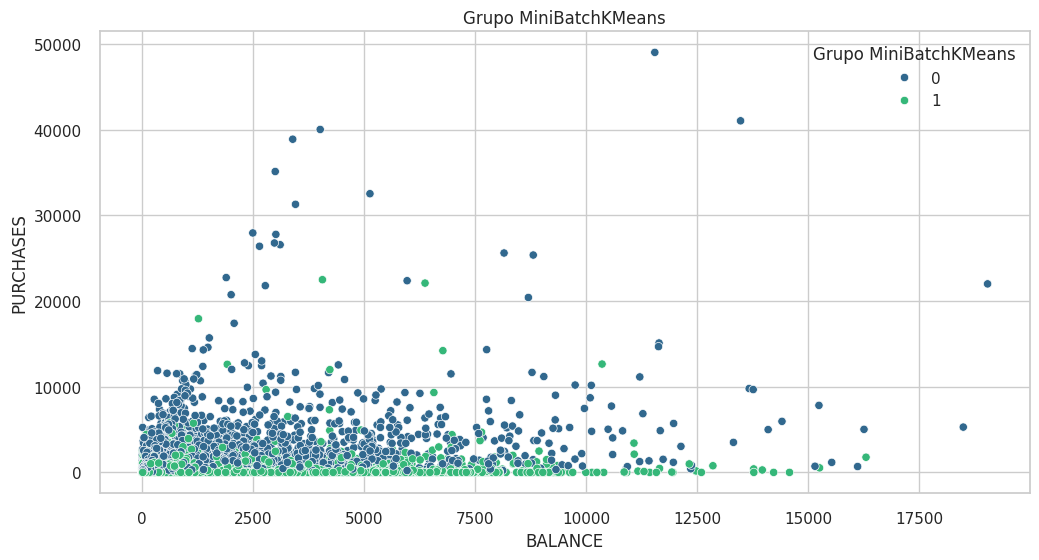

In [112]:
# Graficar Grupos MiniBatchKMeans
# fig = px.scatter_3d(datosGrupos, x='BALANCE', y='PURCHASES', z='CREDIT_LIMIT', color='Grupo MiniBatchKMeans')
# fig.show()

# Graficar Grupos MiniBatchKMeans 2d
plt.figure(figsize=(12, 6))
sns.scatterplot(data=datosGrupos, x='BALANCE', y='PURCHASES', hue='Grupo MiniBatchKMeans', palette='viridis')
plt.title('Grupo MiniBatchKMeans')
plt.show()

# Clustering Espectral (Spectral Clustering)

Descripción: El clustering espectral es una técnica que usa el espectro (autovalores) de la matriz de similitud de los datos para realizar la agrupación. Este algoritmo es especialmente útil cuando los clusters no son esféricos, como en el caso de clusters en forma de círculos o elipses.

Pasos:

1. Construir una matriz de similitud entre los puntos de datos (por ejemplo, usando la similitud de coseno o la distancia euclidiana).
2. Calcular los autovalores y autovectores de la matriz de similitud.
3. Usar los autovectores principales para reducir la dimensionalidad.
4. Aplicar un algoritmo de clustering (por ejemplo, KMeans) sobre los puntos reducidos dimensionalmente.

In [113]:
# Aplicar el modelo SpectralClustering
model_spectral = SpectralClustering(n_clusters=2, random_state=42)
grupo = model_spectral.fit_predict(data_scaled)

datosGrupos['Grupo Spectral'] = grupo
datosGrupos.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  ...  \
0                    0.000000                          0.083333  ...   
1                    0.000000                          0.000000  ...   
2                    1.000000                          0.000000  ...   
3                    0.083333                          0.000000  ...   
4                    0.083333                          0.000000  ...   

   CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  \
0        1000.0   201.802084        139.509787          0.000000      12   
1        7000.0  4103.032597       1072.340217          0.222222      12   
2        7500.0   622.066742        627.284787          0.000000      12   
3        7500.0     0.000000        864.206542          0.000000      12   
4        1200.0   678.334763        244.791237          0.000000      12   

   Grupo Kmeans  Grupo Jerárquico  Grupo DBSCAN  Grupo MiniBatchKMeans  \
0             0                 1             0                      1   
1             0                 1             0                      1   
2             1                 0             0                      0   
3             0                 1             0                      1   
4             0                 1             0                      1   

   Grupo Spectral  
0               1  
1               1  
2               0  
3               1  
4               1  

[5 rows x 23 columns]

In [114]:
datosGrupos['Grupo Spectral'].value_counts()

Grupo Spectral
1    5162
0    3788
Name: count, dtype: int64

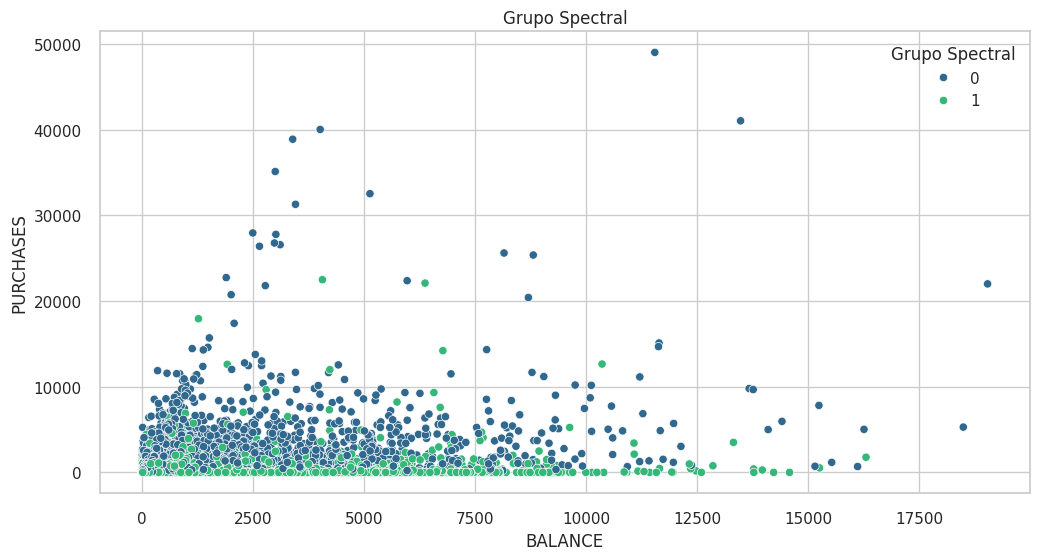

In [115]:
# Graficar Grupos Spectral
# fig = px.scatter_3d(datosGrupos, x='BALANCE', y='PURCHASES', z='CREDIT_LIMIT', color='Grupo Spectral')
# fig.show()

# Graficar Grupos Spectral 2d
plt.figure(figsize=(12, 6))
sns.scatterplot(data=datosGrupos, x='BALANCE', y='PURCHASES', hue='Grupo Spectral', palette='viridis')
plt.title('Grupo Spectral')
plt.show()

In [118]:
# Calcular el indice de silhoutte para los diferentes modelos
silhouette_kmeans = silhouette_score(data_scaled, datosGrupos['Grupo Kmeans'])
silhouette_jerarquico = silhouette_score(data_scaled, datosGrupos['Grupo Jerárquico'])
silhouette_dbscan = silhouette_score(data_scaled, datosGrupos['Grupo DBSCAN'])
silhouette_mini_batch_kmeans = silhouette_score(data_scaled, datosGrupos['Grupo MiniBatchKMeans'])
silhouette_spectral = silhouette_score(data_scaled, datosGrupos['Grupo Spectral'])

# redondear siluetas
silhouette_kmeans = round(silhouette_kmeans, 2)
silhouette_jerarquico = round(silhouette_jerarquico, 2)
silhouette_dbscan = round(silhouette_dbscan, 2)
silhouette_mini_batch_kmeans = round(silhouette_mini_batch_kmeans, 2)
silhouette_spectral = round(silhouette_spectral, 2)

print(f"Silhouette KMeans: {silhouette_kmeans}")
print(f"Silhouette Jerárquico: {silhouette_jerarquico}")
print(f"Silhouette DBSCAN: {silhouette_dbscan}")
print(f"Silhouette MiniBatchKMeans: {silhouette_mini_batch_kmeans}")
print(f"Silhouette Spectral: {silhouette_spectral}")

Silhouette KMeans: 0.39
Silhouette Jerárquico: 0.36
Silhouette DBSCAN: 0.35
Silhouette MiniBatchKMeans: 0.39
Silhouette Spectral: 0.39


# Se deduce que el mejor modelo es Spectral Clustering.

Apartir de este momento usaremos el data de Grupo Spectral Clustering

In [120]:
# Eliminar columnas kmens, jerarquico, dbscan, mini batch kmeans.
datosGrupos = datosGrupos.drop(['Grupo Kmeans', 'Grupo Jerárquico', 'Grupo DBSCAN', 'Grupo MiniBatchKMeans'], axis=1)

datosGrupos.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Grupo Spectral  
0   201.802084        139.509787          0.000000      12               1  
1  4103.032597       1072.340217          0.222222      12               1  
2   622.066742        627.284787          0.000000      12               0  
3     0.000000        864.206542          0.000000      12               1  
4   678.334763        244.791237          0.000000      12               1

In [122]:
# Genera un groupby por grupo spectral 
grouped = datosGrupos.groupby('Grupo Spectral').describe()
grouped



BALANCE                                             \
                 count         mean          std  min         25%   
Grupo Spectral                                                      
0               3788.0  1395.394202  2106.026239  0.0   95.454811   
1               5162.0  1688.550265  2054.743240  0.0  188.892190   

                                                      BALANCE_FREQUENCY  \
                        50%          75%          max             count   
Grupo Spectral                                                            
0                532.041745  1760.998207  19043.13856            3788.0   
1               1061.797467  2267.559473  16304.88925            5162.0   

                          ... PRC_FULL_PAYMENT       TENURE             \
                    mean  ...              75%  max   count       mean   
Grupo Spectral            ...                                            
0               0.939968  ...              0.5  1.0  3788.0  11.597413   
1               0.831262  ...              0.0  1.0  5162.0  11.458543   

                                                       
                     std  min   25%   50%   75%   max  
Grupo Spectral                                         
0               1.260504  6.0  12.0  12.0  12.0  12.0  
1               1.389865  6.0  12.0  12.0  12.0  12.0  

[2 rows x 136 columns]

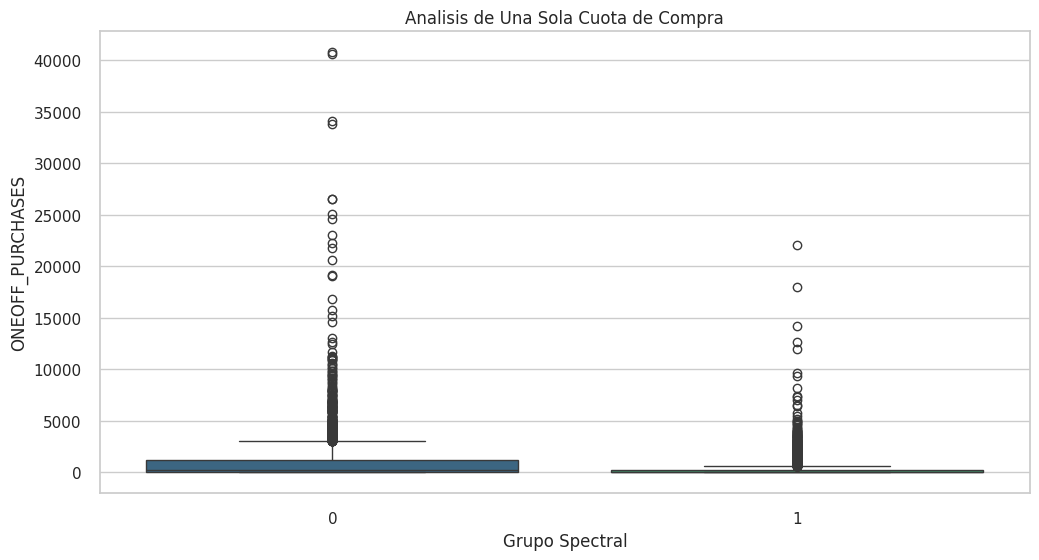

In [132]:
# graficas ONEOFF_PURCHASES comparando grupo spectral
plt.figure(figsize=(12, 6))
sns.boxplot(data=datosGrupos, x='Grupo Spectral', y='ONEOFF_PURCHASES', palette='viridis')
plt.title('Analisis de Una Sola Cuota de Compra')
plt.show()

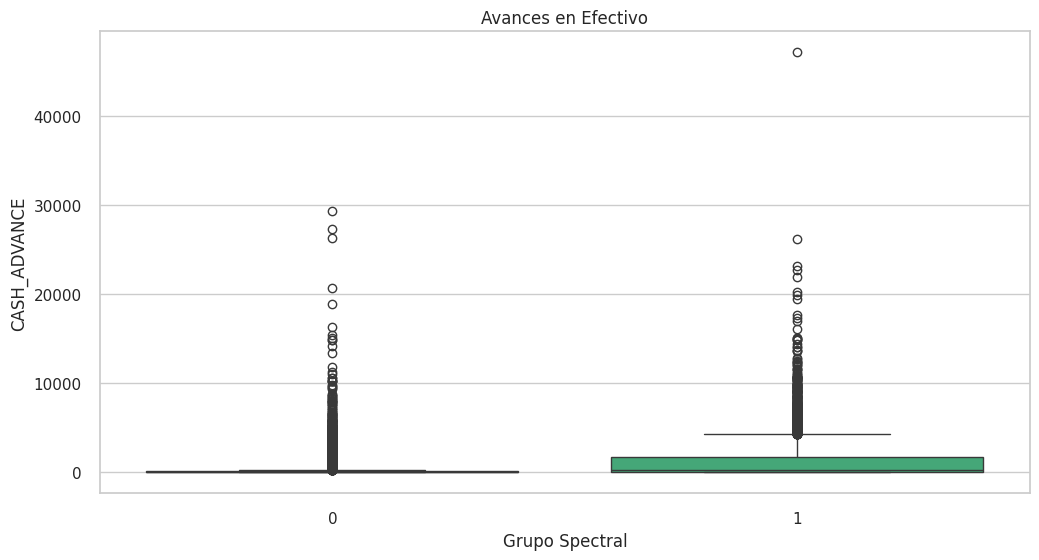

In [133]:
# Graficar CASH_ADVANCE comparando grupo spectral
plt.figure(figsize=(12, 6))
sns.boxplot(data=datosGrupos, x='Grupo Spectral', y='CASH_ADVANCE', palette='viridis')
plt.title('Avances en Efectivo')
plt.show()

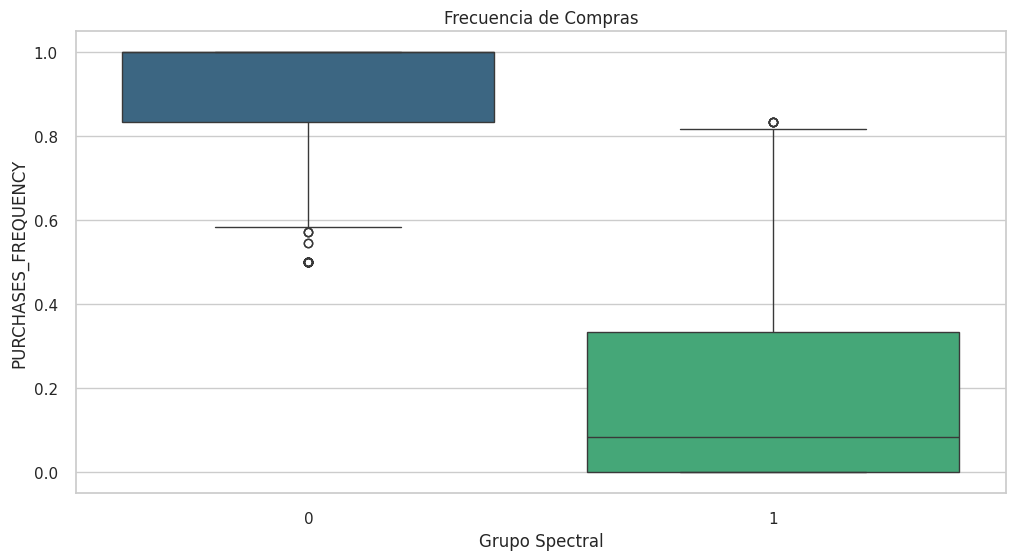

In [134]:
# Graficas PURCHASES_FREQUENCY comparando grupo spectral
plt.figure(figsize=(12, 6))
sns.boxplot(data=datosGrupos, x='Grupo Spectral', y='PURCHASES_FREQUENCY', palette='viridis')
plt.title('Frecuencia de Compras')
plt.show()

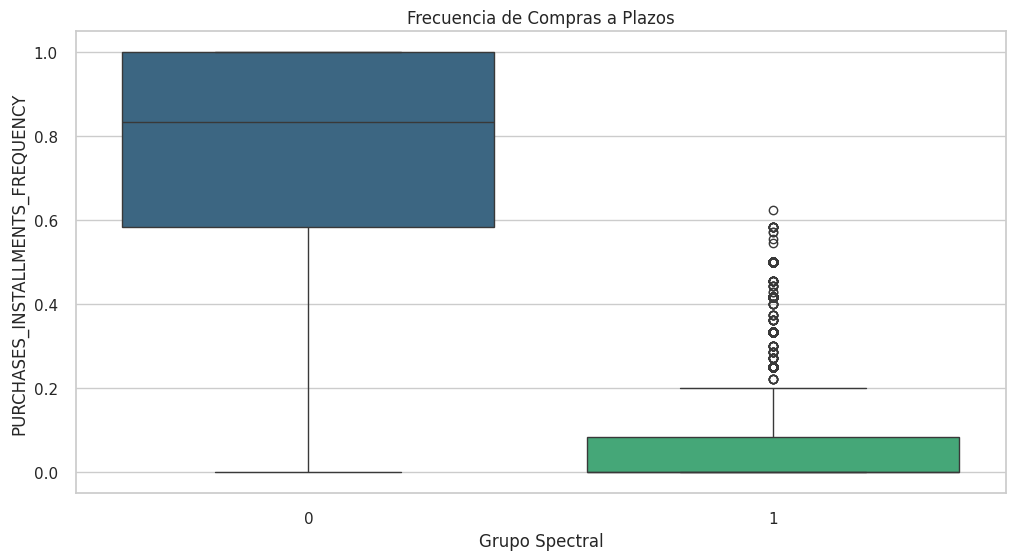

In [135]:
# Graficas PURCHASES_INSTALLMENTS_FREQUENCY comparando grupo spectral
plt.figure(figsize=(12, 6))
sns.boxplot(data=datosGrupos, x='Grupo Spectral', y='PURCHASES_INSTALLMENTS_FREQUENCY', palette='viridis')
plt.title('Frecuencia de Compras a Plazos')
plt.show()

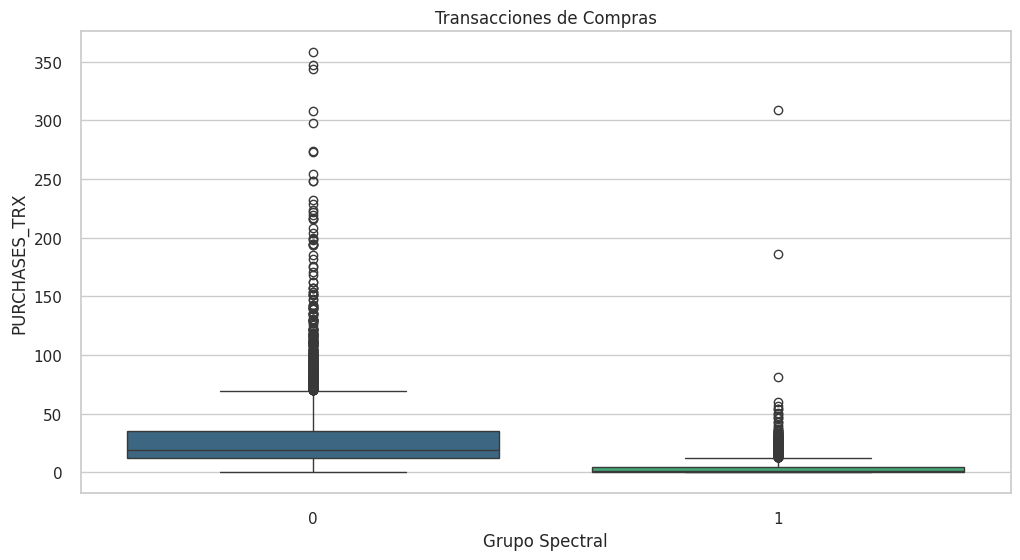

In [137]:
# Graficas PURCHASES_TRX comparando grupo spectral
plt.figure(figsize=(12, 6))
sns.boxplot(data=datosGrupos, x='Grupo Spectral', y='PURCHASES_TRX', palette='viridis')
plt.title('Transacciones de Compras')
plt.show()

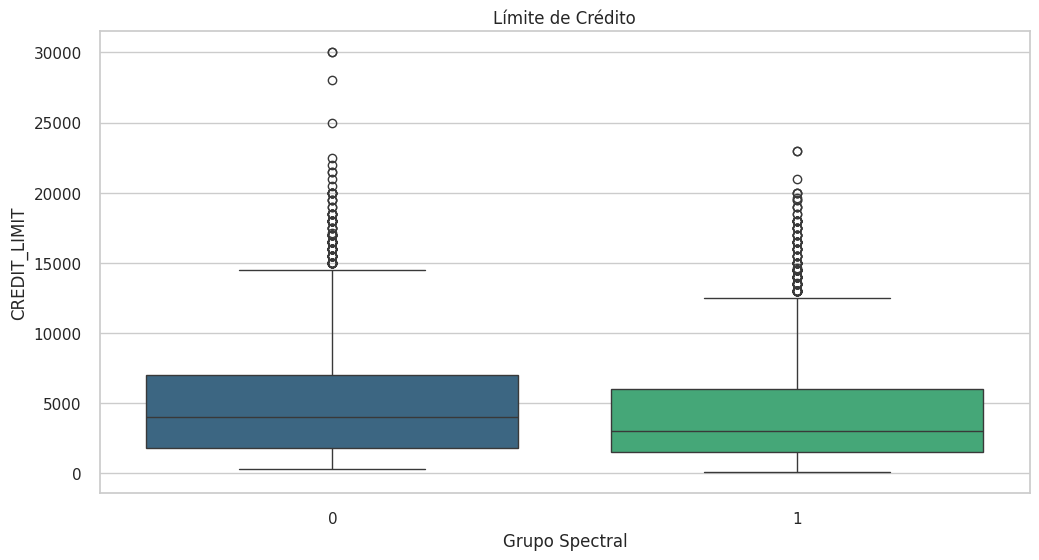

In [138]:
# Graficas CREDIT_LIMIT comparando grupo spectral
plt.figure(figsize=(12, 6))
sns.boxplot(data=datosGrupos, x='Grupo Spectral', y='CREDIT_LIMIT', palette='viridis')
plt.title('Límite de Crédito')
plt.show()

# Respondiendo la pregunta objetivó se puede deducir que el grupo con mejores características para tener una segunda tarjeta de crédito es el 0